In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"D:\powerpulse_project\data\individual+household+electric+power+consumption\household_power_consumption.txt"

In [3]:
df=pd.read_csv(file_path,
               sep=';',
               parse_dates=[[0,1]],
               infer_datetime_format=True,
               na_values=['?'],
               low_memory=False)
#Rename the combined datetime column
df.rename(columns={'Date_Time': 'datetime'}, inplace=True)

#Display basic info
print("Dataset loaded!")
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


C:\Users\ALDO\AppData\Local\Temp\ipykernel_22152\4116658816.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(file_path,
C:\Users\ALDO\AppData\Local\Temp\ipykernel_22152\4116658816.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv(file_path,


Dataset loaded!
Shape of dataset: (2075259, 8)
Columns: ['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


C:\Users\ALDO\AppData\Local\Temp\ipykernel_22152\4116658816.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df=pd.read_csv(file_path,


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [5]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [6]:
#checking missing values
df.isnull().sum()

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

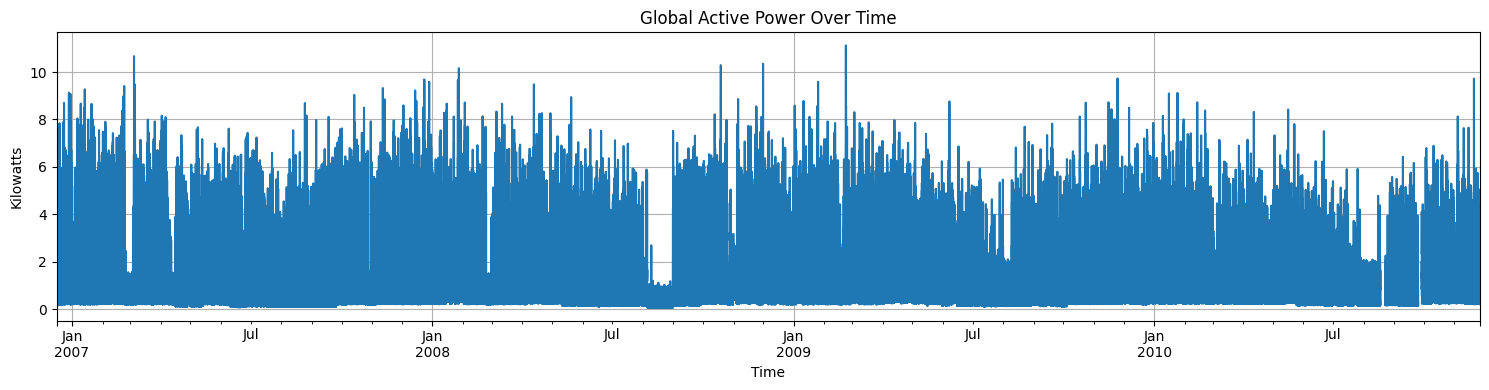

In [7]:
# convert revelant columns to numeric
cols_to_convert=df.columns.drop('datetime')
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
#  Set datetime as index
df.set_index('datetime', inplace=True)

# Line plot of Global Active Power
df['Global_active_power'].plot(figsize=(15, 4), title='Global Active Power Over Time')
plt.ylabel('Kilowatts')
plt.xlabel('Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
print("\n📊 Descriptive Statistics:")
print(df.describe())



📊 Descriptive Statistics:
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06   
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00   
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+

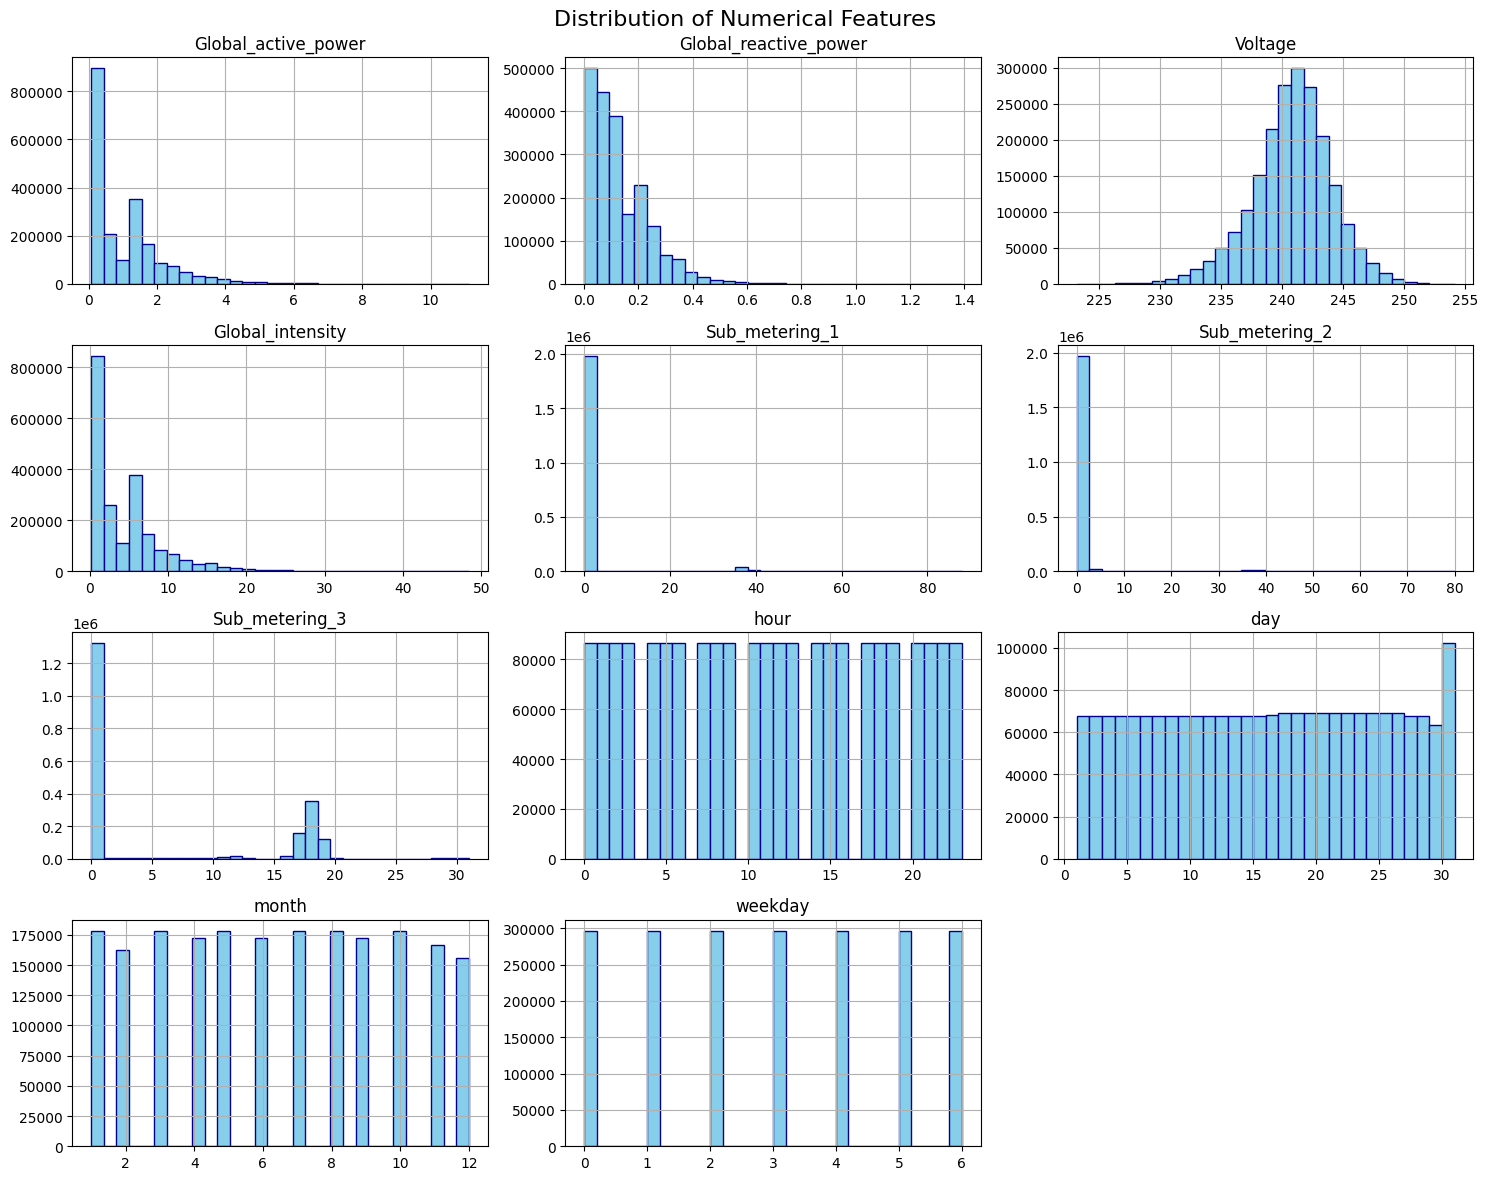

In [16]:
#Histogram of all numeric columns
df.hist(figsize=(15, 12), bins=30, color='skyblue', edgecolor='darkblue')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


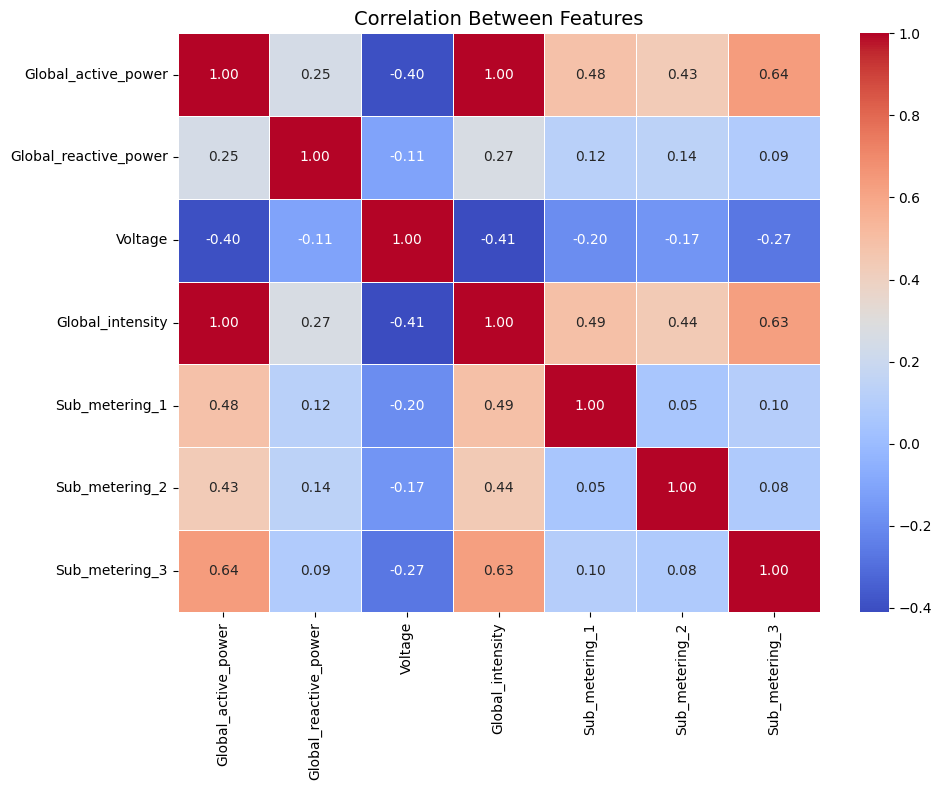

In [9]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Features', fontsize=14)
plt.tight_layout()
plt.show()


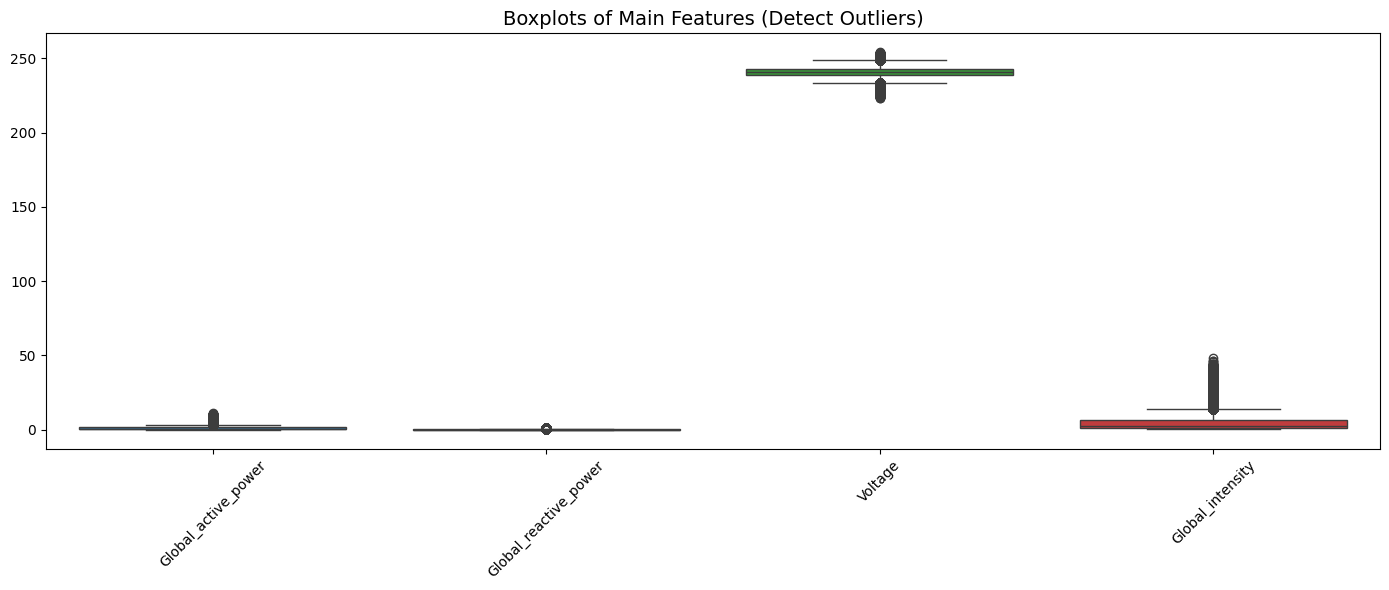

In [10]:
#Boxplots to Detect Outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])
plt.title('Boxplots of Main Features (Detect Outliers)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

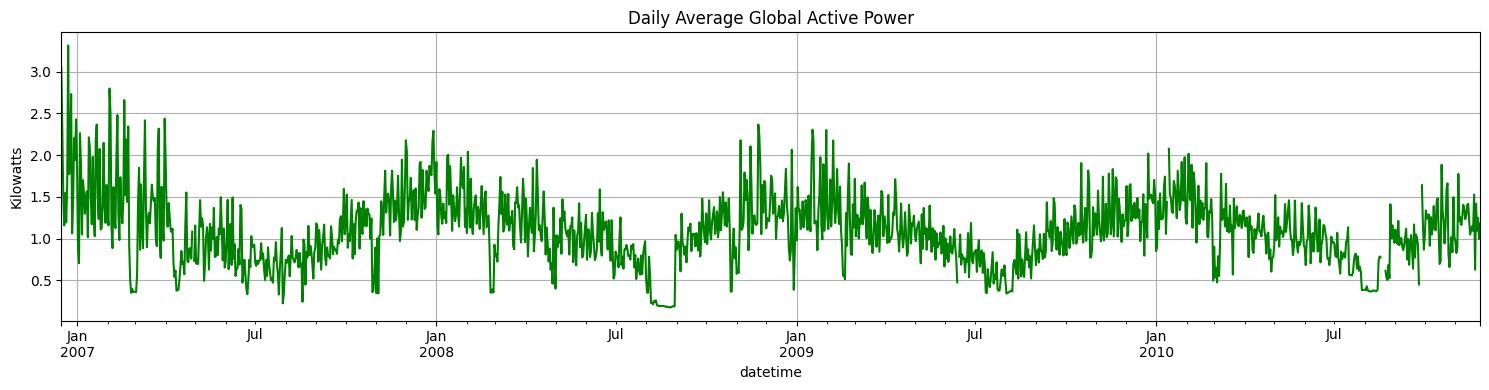

In [11]:
#Daily Resample of Global Active Power
df_daily = df['Global_active_power'].resample('D').mean()
plt.figure(figsize=(15, 4))
df_daily.plot(title='Daily Average Global Active Power', ylabel='Kilowatts', color='green')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
#Time-based Feature Extraction (Optional – used in modeling)
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['weekday'] = df.index.dayofweek

In [17]:
import numpy as np

#Cyclical Encoding for hour and weekday
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

#Rolling Mean Features (to smooth out noise)
df['rolling_3h'] = df['Global_active_power'].rolling(window=3).mean()
df['rolling_24h'] = df['Global_active_power'].rolling(window=24).mean()

#Lag Features (to introduce time memory)
df['lag_1h'] = df['Global_active_power'].shift(1)
df['lag_24h'] = df['Global_active_power'].shift(24)

#Drop rows with NaN due to rolling or lag
df.dropna(inplace=True)

print("Feature Engineering completed. New shape:", df.shape)


Feature Engineering completed. New shape: (2047594, 19)


In [18]:
from sklearn.model_selection import train_test_split

#Define target and features
target = 'Global_active_power'
features = df.drop(columns=[target])  # All except the target
X = features.select_dtypes(include='number')  # Select only numeric features
y = df[target]

#Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (1638075, 18)
Testing data shape: (409519, 18)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_preds = lr_model.predict(X_test)

# Evaluate performance
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print("Linear Regression Results:")
print("RMSE:", round(lr_rmse, 4))
print("MAE:", round(lr_mae, 4))
print("R² Score:", round(lr_r2, 4))


Linear Regression Results:
RMSE: 0.0394
MAE: 0.0251
R² Score: 0.9986


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)

# Evaluate performance
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\n Random Forest Regressor Results:")
print("RMSE:", round(rf_rmse, 4))
print("MAE:", round(rf_mae, 4))
print("R² Score:", round(rf_r2, 4))



 Random Forest Regressor Results:
RMSE: 0.0216
MAE: 0.0098
R² Score: 0.9996
